In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import os

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set Pandas display options to see all columns clearly in console
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("flight-price-prediction/clean_data_v2.csv")
df

,Airline,Source,Departure Time,Stops,Arrival Time,Destination,Class,Duration,Days Left,Price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,130,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,140,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,135,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,140,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,605,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,625,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,830,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,600,49,81585


In [4]:
# Set a clean style for better readability
sns.set_style("whitegrid")

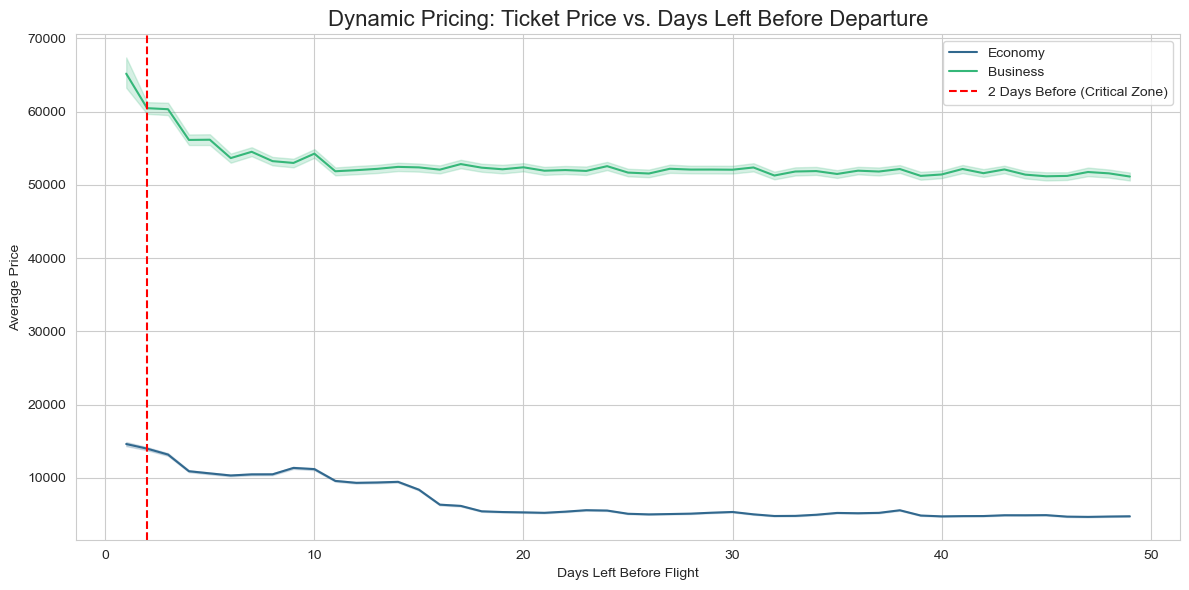

In [5]:
# Purpose: Answer "How does price change 1-2 days before departure?"
# We use a line plot with a confidence interval to show the trend.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Days Left', y='Price', hue='Class', palette='viridis')
plt.title('Dynamic Pricing: Ticket Price vs. Days Left Before Departure', fontsize=16)
plt.xlabel('Days Left Before Flight')
plt.ylabel('Average Price')
plt.axvline(x=2, color='red', linestyle='--', label='2 Days Before (Critical Zone)')
plt.legend()
plt.tight_layout()
plt.show()

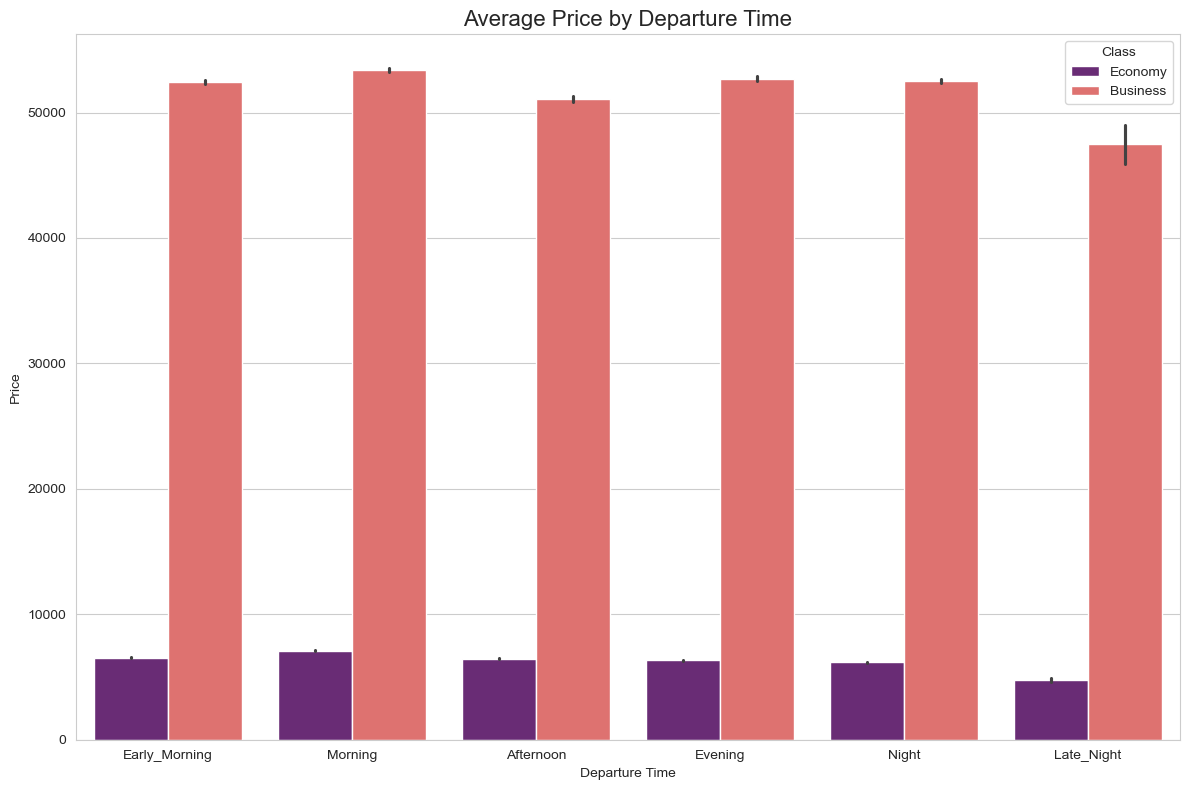

In [6]:
# Purpose: Do "Late Night" or "Early Morning" flights cost less?
# We order the times chronologically for better readability.
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Departure Time', y='Price', hue='Class', order=time_order, palette='magma')
plt.title('Average Price by Departure Time', fontsize=16)
plt.tight_layout()
plt.show()

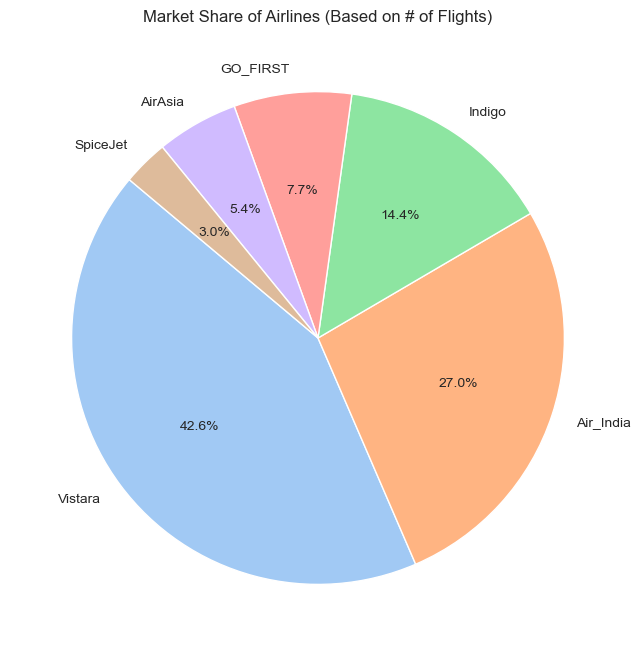

In [7]:
# Chart 1: Market Share of Airlines
plt.figure(figsize=(8, 8))
airline_counts = df['Airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Market Share of Airlines (Based on # of Flights)')
plt.show()

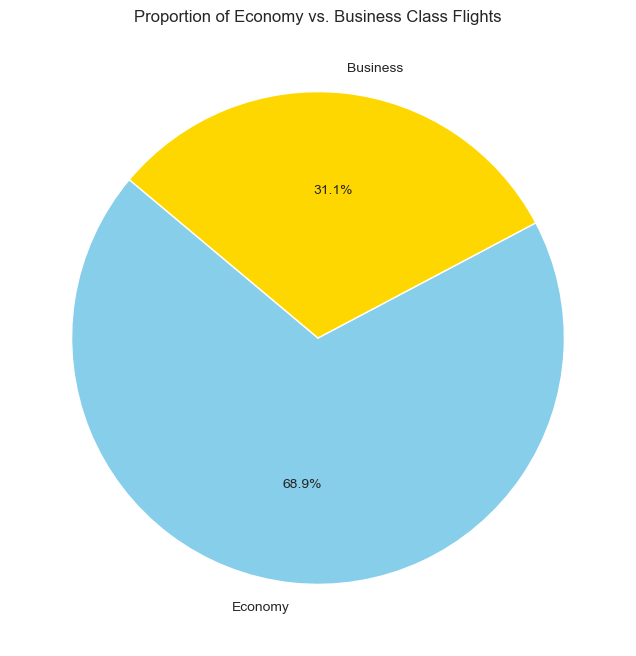

In [8]:
# Chart 2: Economy vs Business Class Split
plt.figure(figsize=(8, 8))
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'gold'])
plt.title('Proportion of Economy vs. Business Class Flights')
plt.show()

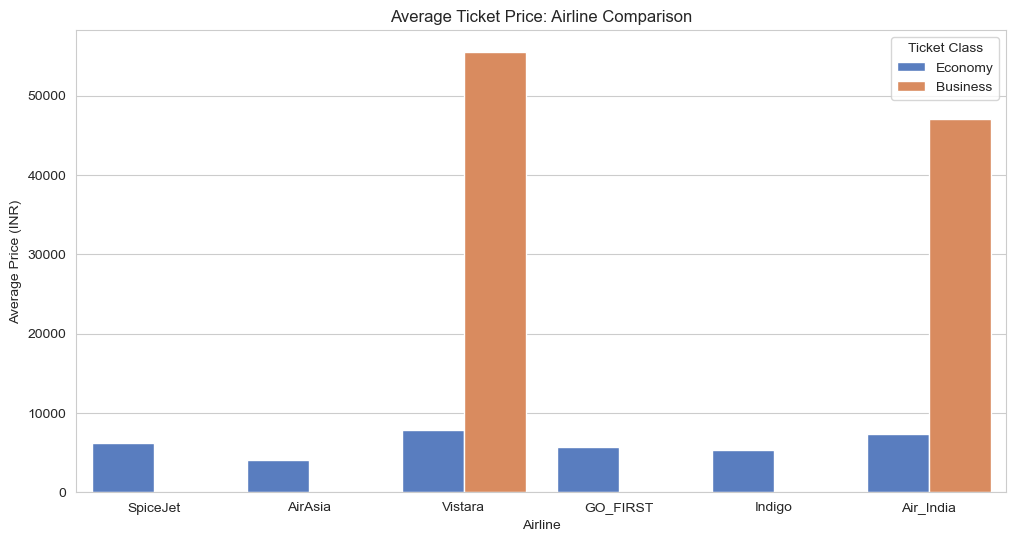

In [9]:
# Chart 3: Average Price by Airline (Split by Class for fairness)
plt.figure(figsize=(12, 6))
# We use a bar chart with 'hue' to keep it simple but accurate
sns.barplot(data=df, x='Airline', y='Price', hue='Class', palette='muted', errorbar=None)
plt.title('Average Ticket Price: Airline Comparison')
plt.ylabel('Average Price (INR)')
plt.xlabel('Airline')
plt.legend(title='Ticket Class')
plt.show()

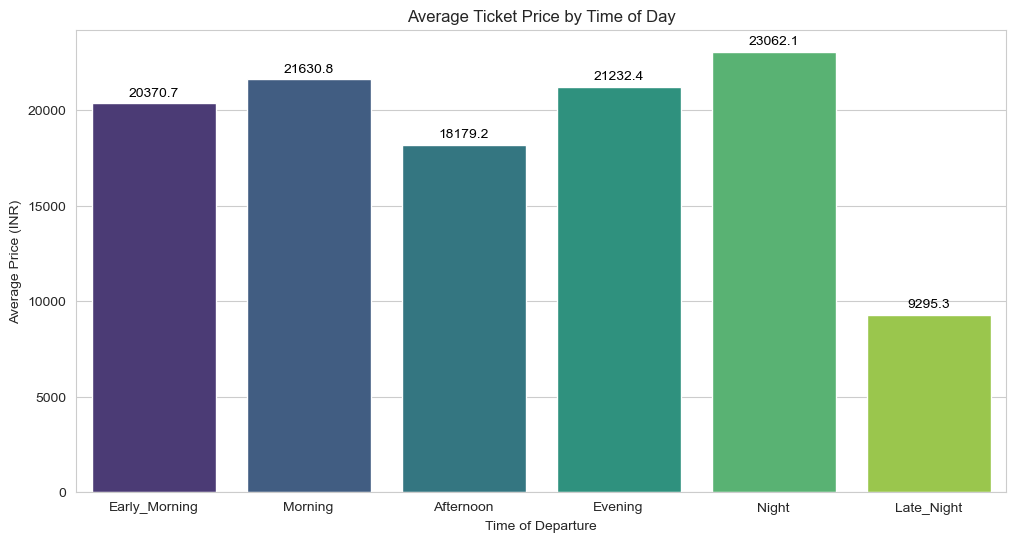

In [10]:
# Chart 4: Average Price by Departure Time
# Reordering time for logical flow
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df, 
    x='Departure Time', 
    y='Price', 
    order=time_order, 
    palette='viridis', 
    errorbar=None
)

# Add bar labels for ALL containers
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=10, color='black', padding=3)

plt.title('Average Ticket Price by Time of Day')
plt.ylabel('Average Price (INR)')
plt.xlabel('Time of Departure')
plt.show()

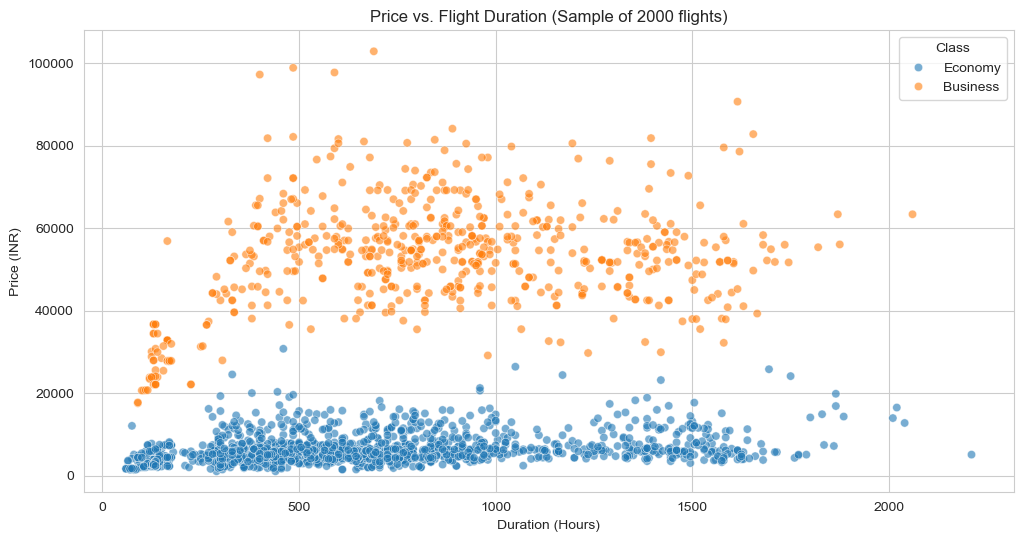

In [11]:
# Chart 5: Price vs. Duration (Do longer flights cost more?)
plt.figure(figsize=(12, 6))
# Sample the data if it's too large to make the dots clearer (optional, but good for large datasets)
subset = df.sample(n=min(2000, len(df)), random_state=42)
sns.scatterplot(data=subset, x='Duration', y='Price', hue='Class', alpha=0.6)
plt.title('Price vs. Flight Duration (Sample of 2000 flights)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Price (INR)')
plt.show()

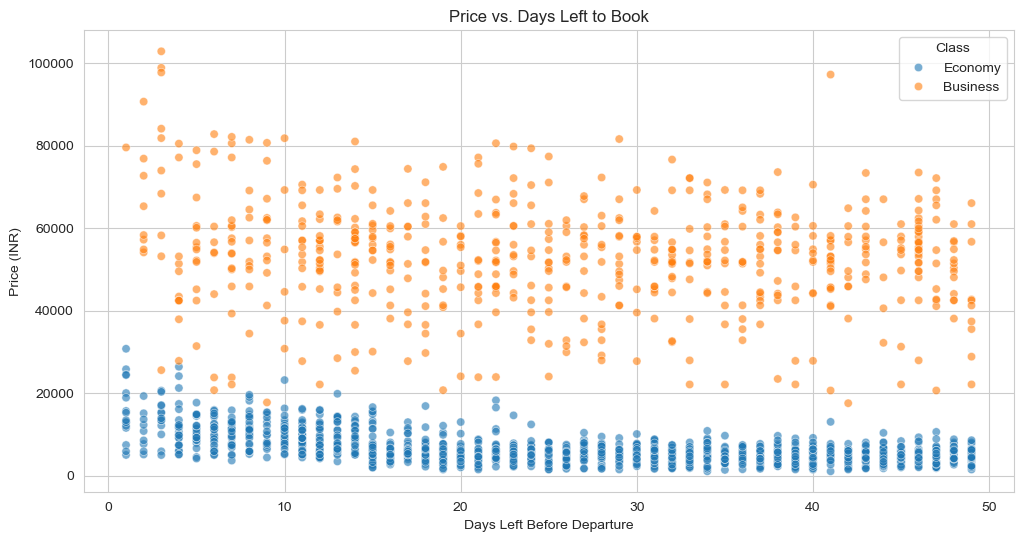

In [12]:
# Chart 6: Price vs. Days Left (How booking early saves money)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=subset, x='Days Left', y='Price', hue='Class', alpha=0.6)
plt.title('Price vs. Days Left to Book')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Price (INR)')
plt.show()

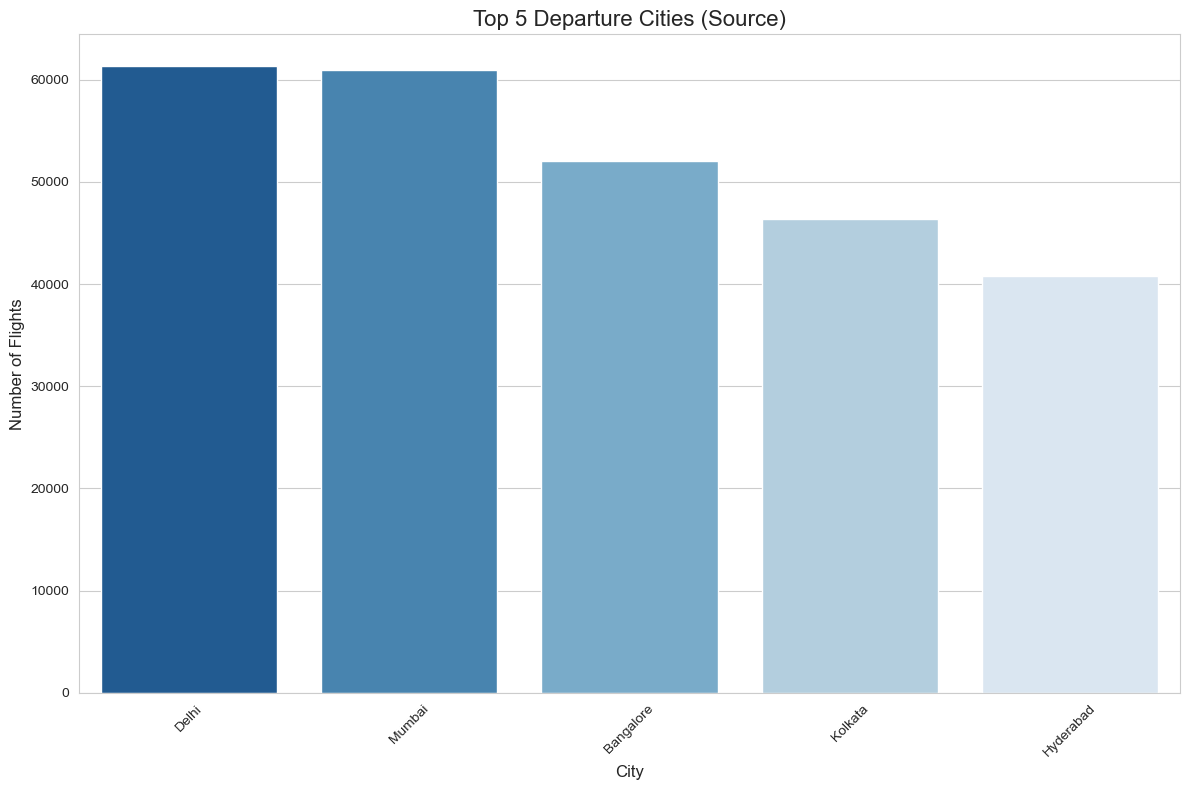

In [13]:
# Get the top 5 most common Departure cities
top_sources = df['Source'].value_counts().head(5)

# 3. Create Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_sources.index, y=top_sources.values, palette="Blues_r")

plt.title('Top 5 Departure Cities (Source)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

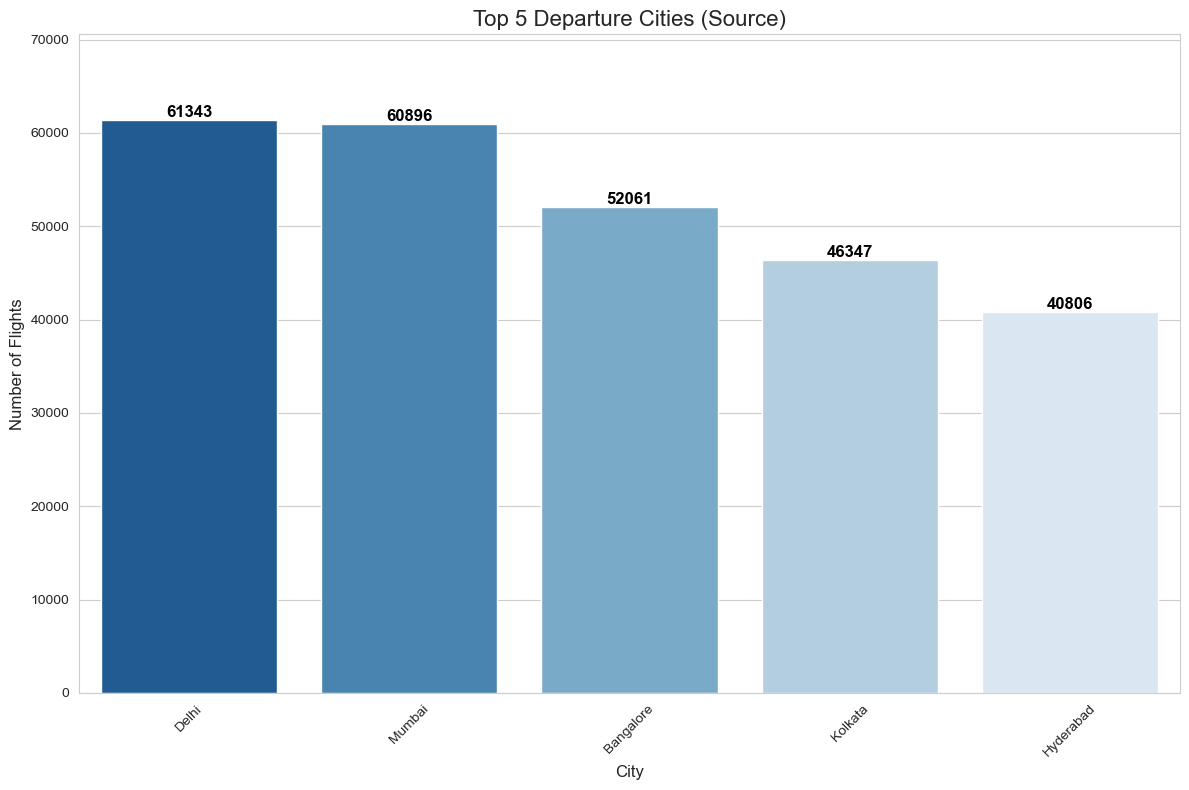

In [14]:
# Get the top 5 most common Departure cities
top_sources = df['Source'].value_counts().head(5)

# 3. Create Visualization
plt.figure(figsize=(12, 8))

# ASSIGN TO 'ax' so we can manipulate the chart elements
ax = sns.barplot(x=top_sources.index, y=top_sources.values, palette="Blues_r")

# --- ADD LABELS MANUALLY ---
# Iterate through every "patch" (bar) in the chart
for p in ax.patches:
    height = p.get_height()
    # Check if height is a valid number to avoid errors on empty bars
    if height > 0:
        ax.text(x=p.get_x() + p.get_width() / 2,  # Center X
                y=height,                         # Y at the top of the bar
                s=f'{height:.0f}',                # The Label text
                ha='center',                      # Horizontal Alignment
                va='bottom',                      # Vertical Alignment (sit on top)
                fontsize=12, 
                color='black',
                fontweight='bold')

# Add 15% space at the top so labels don't get cut off
ax.set_ylim(0, top_sources.values.max() * 1.15)

plt.title('Top 5 Departure Cities (Source)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

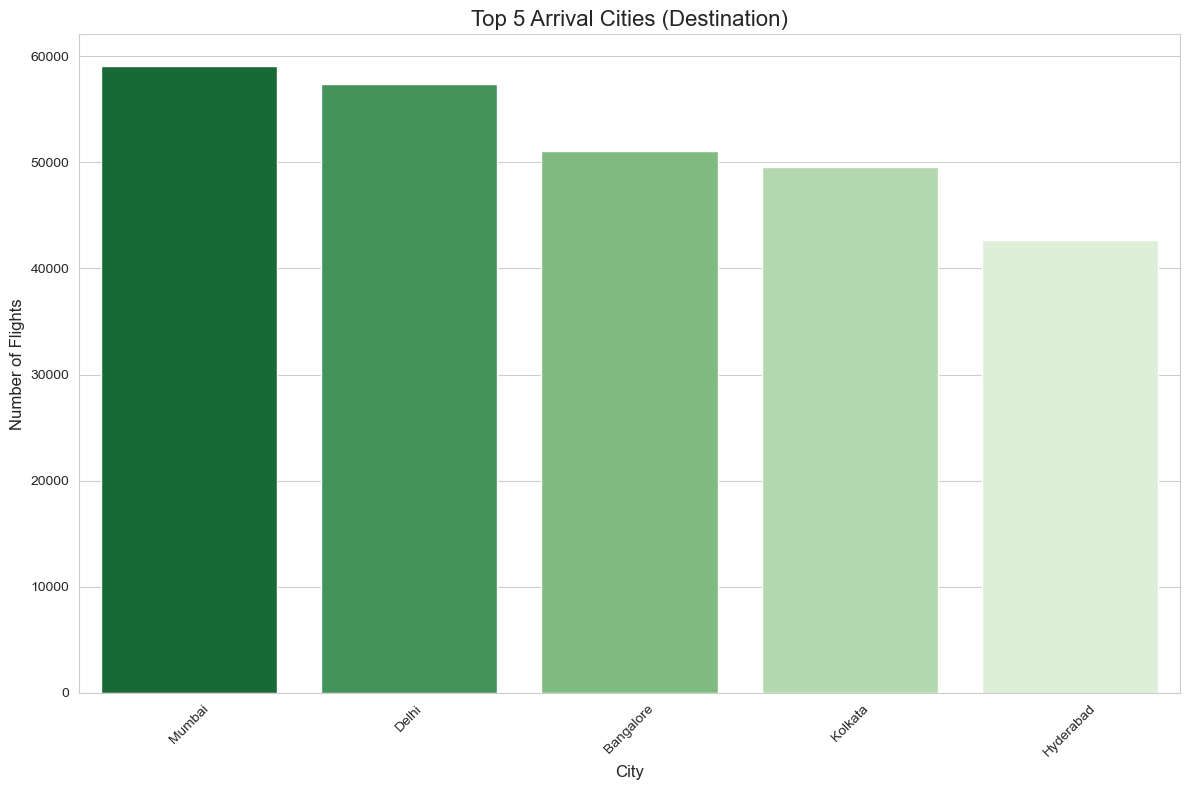

In [15]:
# Get the top 5 most common Arrival cities
top_destinations = df['Destination'].value_counts().head(5)

# 3. Create Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_destinations.index, y=top_destinations.values, palette="Greens_r") 

plt.title('Top 5 Arrival Cities (Destination)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()